In [45]:
#Dataframe manipulation library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titles = pd.read_csv("netflix_titles.csv")
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The columns in the dataset provide a lot of information to us ranging from a unique id, year to a short description of a particular TV Show/Movie.

In [3]:
titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Checking the data types of all columns involved in dataset before proceeding with further analysis.

In [4]:
titles.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Identify and calculate the missing values in each attribute.

In [5]:
titles.isnull().sum()/titles.count()*100

show_id          0.000000
type             0.000000
title            0.000000
director        42.669691
cast            10.335755
country         10.418756
date_added       0.113675
release_year     0.000000
rating           0.079545
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### Defining 2 types of bar plots to plot different data in a visual medium.

In [40]:
def bar_plot_data_v2(df: dict, field: dict, subtitle: str, figsize=(5, 4), top_filter=15, inverted_x=False):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    if top_filter:
        df = df.head(top_filter)
    sns.barplot(data=df, palette='cool', x=field["x"], y=field["y"])
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'{field["x"]}', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field["y"]}', fontsize=13, color = '#333F4B')
    
    if inverted_x:
        plt.xticks(rotation=90)
        
    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5, 4), top_filter=15):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
          
    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    if top_filter:
        df_filter = df_filter.head(top_filter)
    sns.barplot(data=df_filter, palette='cool', x='counts', y=field)
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

### Titles by type

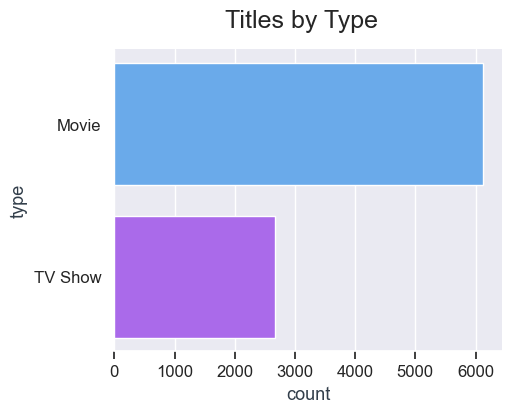

In [65]:
bar_plot_data(titles, "type", "Titles by Type")

## Exploratory Data Analysis on Netflix Dataset

1. Titles released grouped according to the year of release.

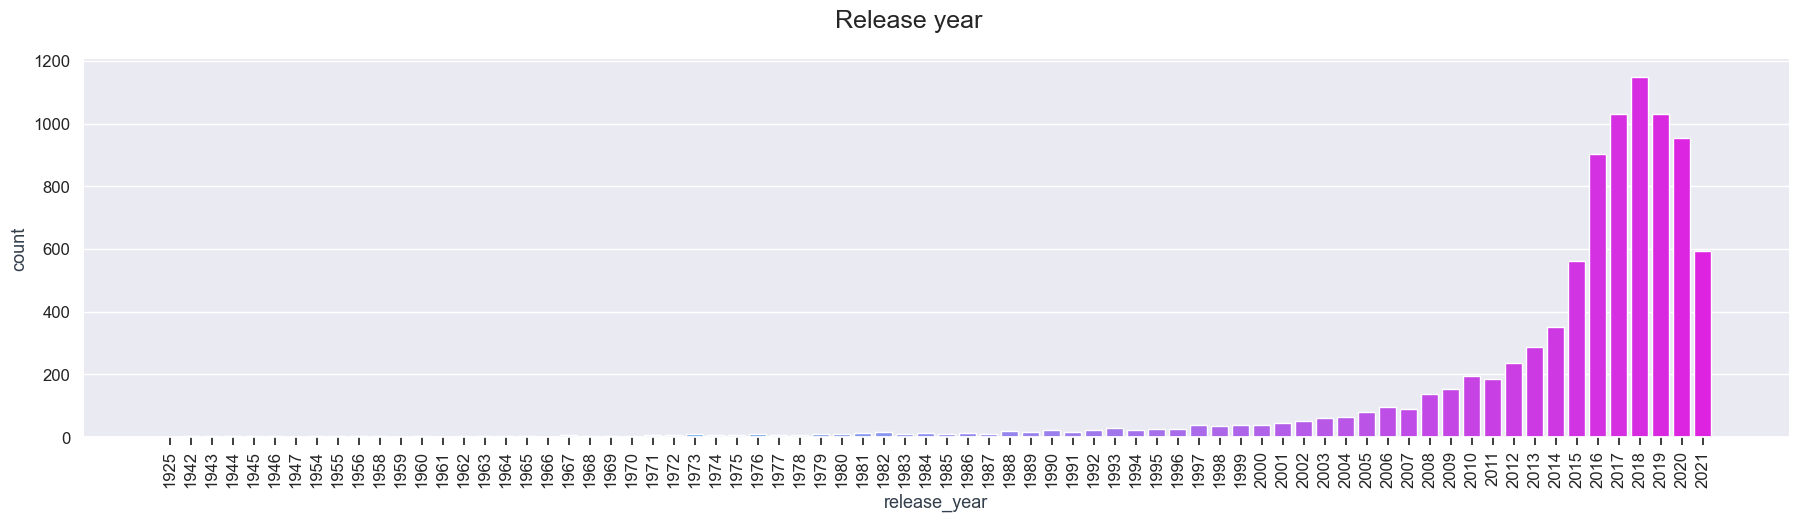

In [47]:
df_filter = titles["release_year"].value_counts().rename_axis("release_year").reset_index(name='count')
bar_plot_data_v2(df_filter,  {"y": "count", "x": "release_year"}, "Release year", (22, 5), top_filter=1000, inverted_x=True)

Let us find number of projects for each `rating` attribute given in the dataset.

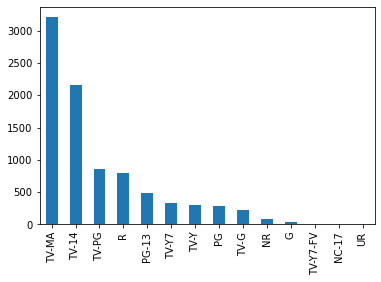

In [6]:
titles["rating"].value_counts().plot.bar();

In [7]:
titles["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

As we see, post the rating 'G', the ratings all have number of samples in the singular digits - hence, are not displayed in the scale of the graph above.

2. Check out the number of titles in the dataset with respect to the released year.

In [8]:
titles["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

3. Check out if the released title was a Movie/TV show based on the released year.

In [9]:
types = titles["type"].value_counts()
types

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [10]:
for i,outcome in enumerate(types.keys()):
    print(i,outcome)

0 Movie
1 TV Show


4. Creating a `Class` label to show if the title is a Movie or a TV Show.

In [11]:
type_class = list()

for row in titles['type']:
        if row == "Movie":
            a = 0
            type_class.append(a)
        else:
            a = 1
            type_class.append(a)

type_class

[0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [12]:
titles["Type Class"] = type_class
titles[["Type Class"]].head(10)

,Type Class
0,0
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,1
9,0


In [13]:
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Type Class
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


Lets check if the majority of titles here are Movies or TV Shows.

In [14]:
titles["Type Class"].mean()

0.3038492108550017

Clearly, the majority of titles are Movies as compared to TV shows.

5. First, let's try to see how the `release_year` and  `show_id` would affect the Type outcome.

We can plot out the release_year vs. show_id overlay the outcome of the type.

## Show IDs vs Release Year

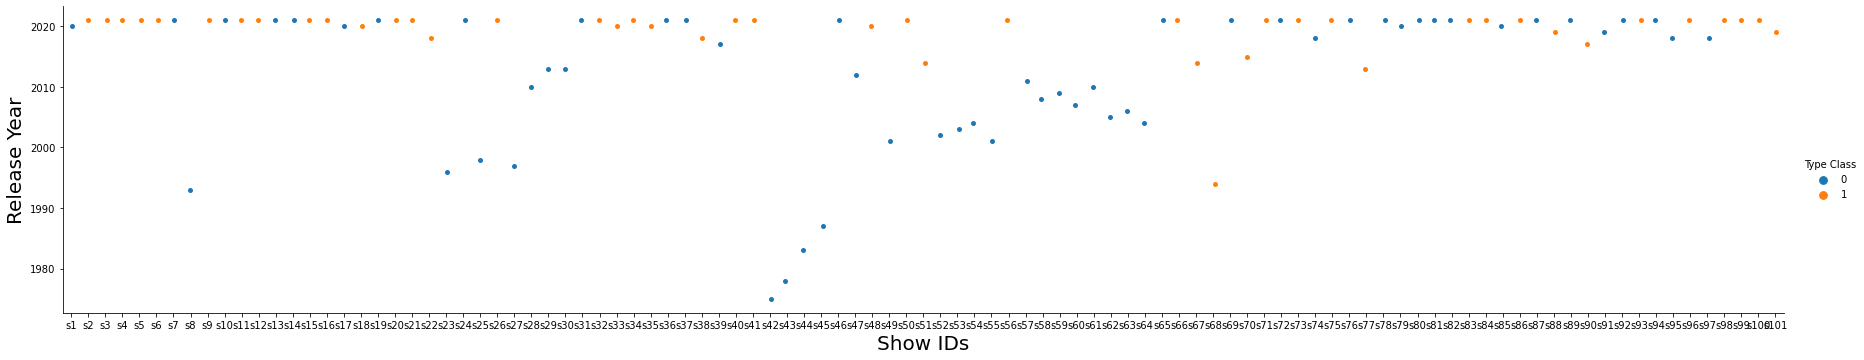

In [15]:
import seaborn as sns
sns.catplot(y="release_year", x="show_id", hue="Type Class", data=titles[:101], aspect=5)
plt.xlabel("Show IDs",fontsize=20)
plt.ylabel("Release Year",fontsize=20)
plt.show()

Here, we can clearly see that in the first 101 rows of the dataset used for visualization, the years 2010 and after are when the number of TV shows clearly starting competing with the number of movies being released.

This is a clear indication of the advent of streaming services like Netflix worldwide post the year 2010 onwards.

6. Relationship between `show_id` and `country` of origin for title

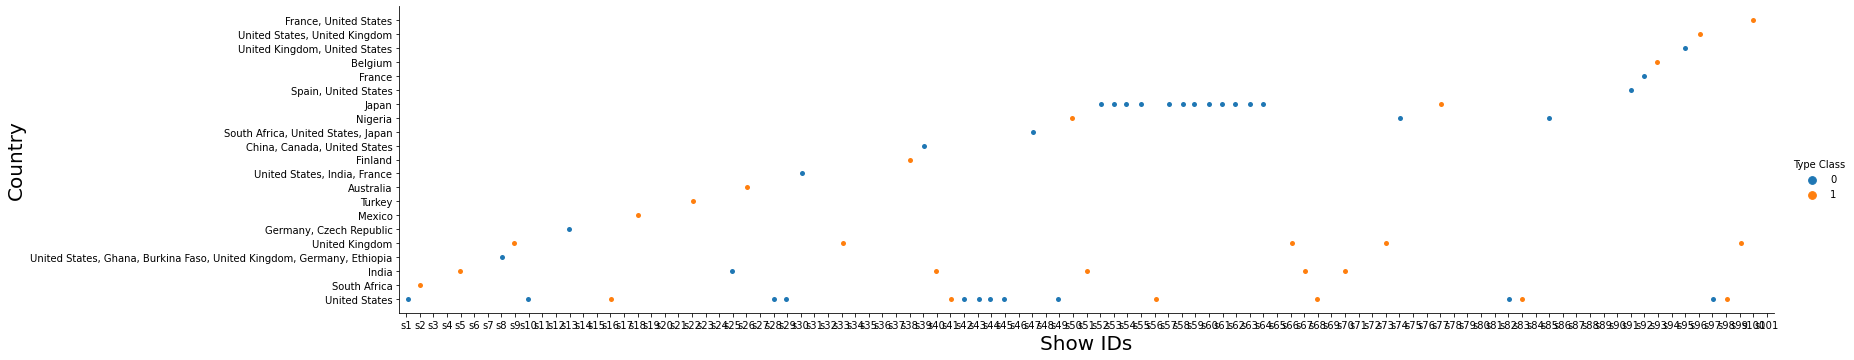

In [16]:
# Plot a scatter point chart with x axis to be Show Ids and y axis to be the country of origin, and hue to be the class value
sns.catplot(y="country", x="show_id", hue="Type Class", data=titles[:101], aspect = 5)
plt.xlabel("Show IDs",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.show()

This scatter plot shows that for the first 101 rows of the dataset - the United States (country of origin for Netflix itself) was heavily involved in the inception of co-productions across the globe in terms of both Movies and TV shows.

7. Relationship between `release_year` and `country` of origin

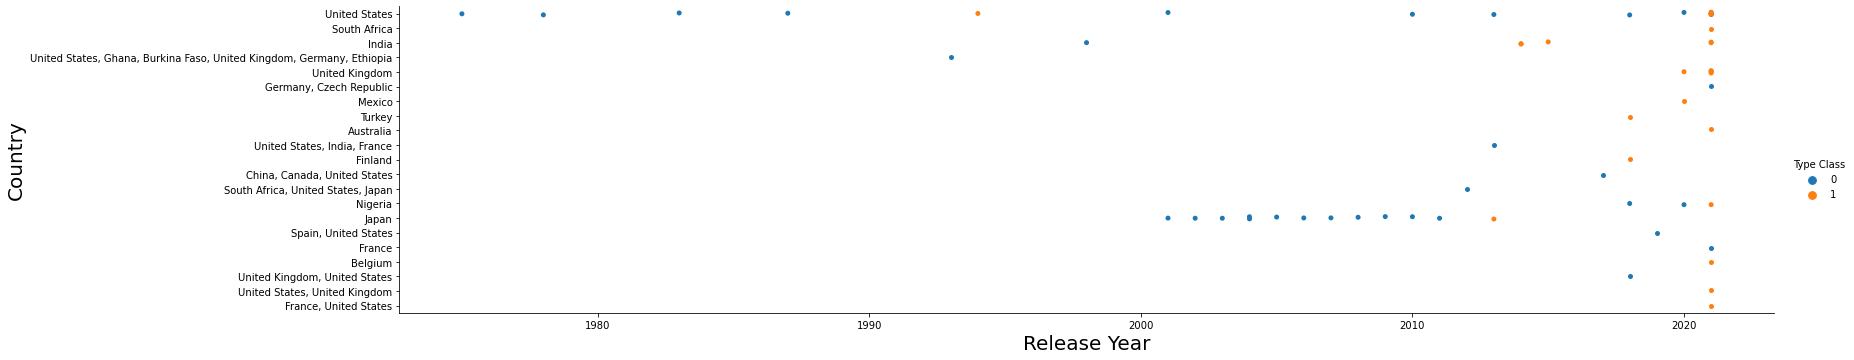

In [17]:
sns.catplot(y="country", x="release_year", hue="Type Class", data=titles[:101], aspect = 5)
plt.xlabel("Release Year",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.show()

Upon looking at the above scatter plot, it becomes clear that Netflix co-productions between the United States and other countries were primarily for the inception of different TV shows. For individual countries like Japan and the US - the number of movies released vastly outnumber the number of TV shows produced.

8. Relationship between Type of content (TV/Movies) and Country of Release

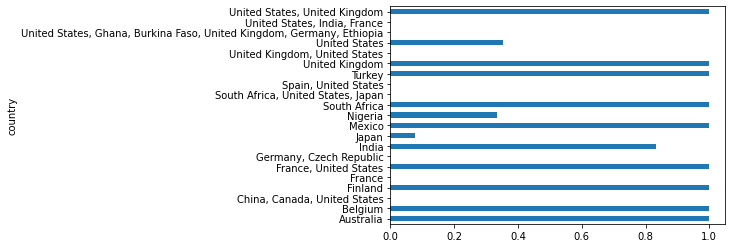

In [18]:
grouped_df = titles[:101].groupby('country')
mean_df = grouped_df['Type Class'].mean()


mean_df.plot.barh(x='country',y='Type Class',rot=0);

In the first 101 rows of this dataset, you can see the primary content coming out of countries like India, France, China, Canada, Germany, Ethiopia etc are primarily Feature length movies. Countries like the US, UK, Australia, Finland have produced TV shows in this dataset as can be seen above.

9. Relationship between the Maturity ratings of content and the country of origin.

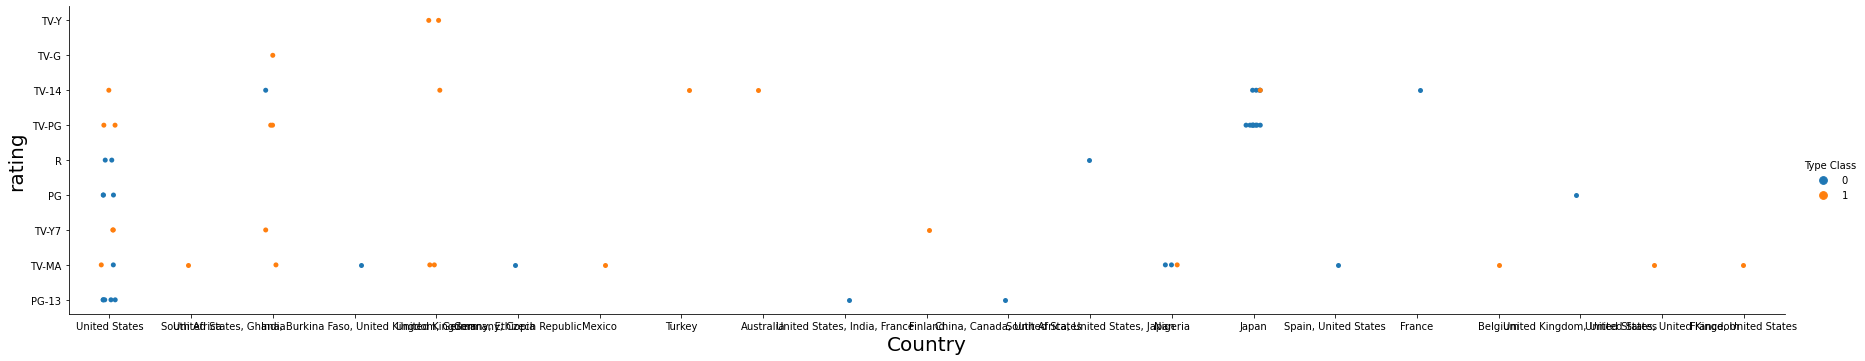

In [19]:
sns.catplot(y="rating", x="country", hue="Type Class", data=titles[:101], aspect = 5)
plt.xlabel("Country",fontsize=20)
plt.ylabel("rating",fontsize=20)
plt.show()

In this dataset, the United States is involved the most in the creation of TV shows and movies as co-productions and sole productions primarily. These are of all rating types. Spain has primarily produced movies having ratings of TV-PG and TV-14. 

Also, majority of countires do not produce content which are TV-G and TV-Y in nature. The dominant rating scheme is TV-MA for the content produced among all the countries in this dataset.

10. Ratings vs the Show Ids present in the dataset.

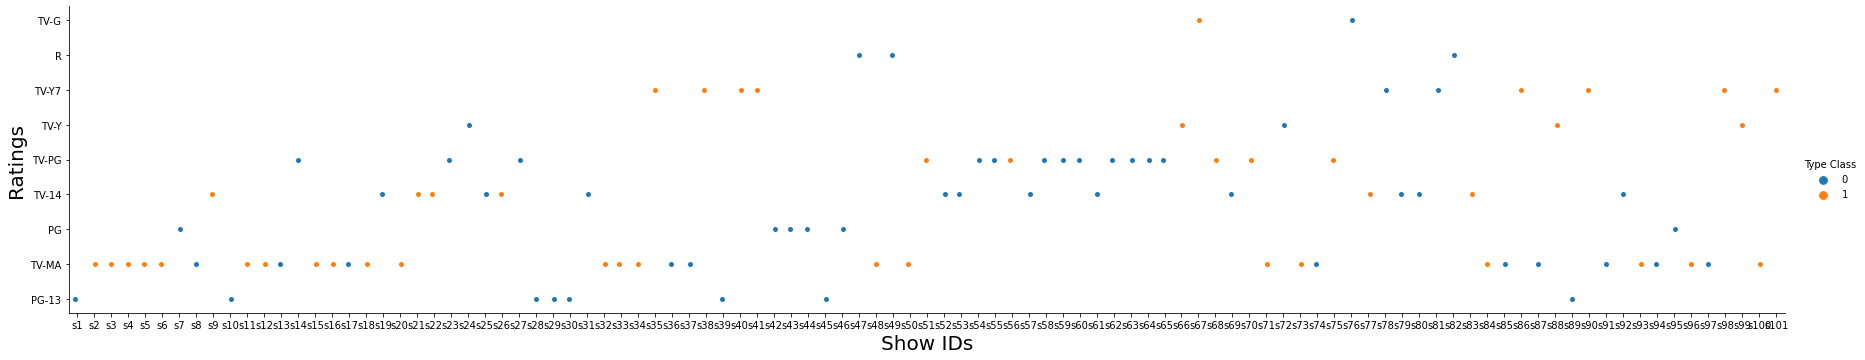

In [20]:
sns.catplot(y="rating", x="show_id", hue="Type Class", data=titles[:101], aspect=5)
plt.xlabel("Show IDs",fontsize=20)
plt.ylabel("Ratings",fontsize=20)
plt.show()

The first 101 rows of the dataset shows a wide range of 101 titles with the majority of the distributions under rating TV-MA, TV-14 and TV-PG. The least rated titles are TV-G and R. Since these titles are all randomly distributed with their respective information - there isn't much information to gather from this particular scatter plot as a relationship between the 2 variables involved.

11. Yearly trend towards TV Shows being produced

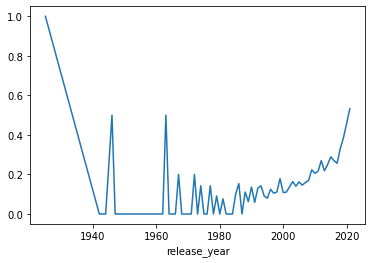

In [21]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate for TV show produced
gdf = titles.groupby("release_year")

meandf = gdf['Type Class'].mean()

meandf.plot.line(x='Year',y='TV Shows',rot=0);

* This line plot states that, in our dataset - there is exactly ONE TV show which was listed as produced before the year 1940. 
* Post 1940, between the years 1945 till 1965 - there were a few TV shows produced as listed in our dataset. Here, the majority of content being produced was Movies.
* The number of TV shows produced between 1966 till 1990 are not as high as those produced in the previous years' bracket. Again, it were movies that dominated the viewing practice as per our dataset.
* As mentioned earlier - it is post the year 2000 that we can see more and more TV shows being produced and an upward trend only increasing even as of year 2020.

Other possible pattern finders:
1. Group dataset by 'Movie' and find the patterns in runtime from different countries.
2. Runtime by Ratings provided.
3. listed_in by Ratings provided.
4. listed_in by countries of origin.

In [22]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate for TV show produced
movies_df = titles[titles["Type Class"] == 0]
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Type Class
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-Sep-21,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,0


In [23]:
movies_df["duration"].value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [24]:
movies_df["duration"]=movies_df.duration.str.extract('(\d+)')
movies_df["duration"].head(10)

C:\Users\Avi\AppData\Local\Temp\ipykernel_5864\2386502647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["duration"]=movies_df.duration.str.extract('(\d+)')


0      90
6      91
7     125
9     104
12    127
13     91
16     67
18     94
22    161
23     61
Name: duration, dtype: object

### Release Year vs Median Runtimes that year

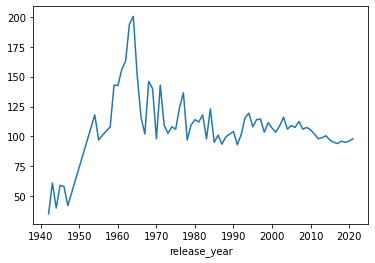

In [25]:
g_df = movies_df.groupby("release_year")

m_df = g_df["duration"].median()

m_df.plot.line(x="release_year",y="duration",rot=0);

As we see, the median runtimes of all the movies in our dataset from multiple countries steadily increases from the 1940s till the 1970s. This may coincide with the inception of cinema on films and as an entry level experimentation phase.

From the 1970s till the late 1990s, there are constant variances in the median runtimes of the movies listed in the dataset. However, post that period - we see that there is a steady decrease in the median runtimes. One probable cause for this is the formation of the concept of blockbuster movies and an overall effort to decrease the runtimes for theatre audiences and streaming partners.

### Runtimes vs the ratings alloted for particular dataset

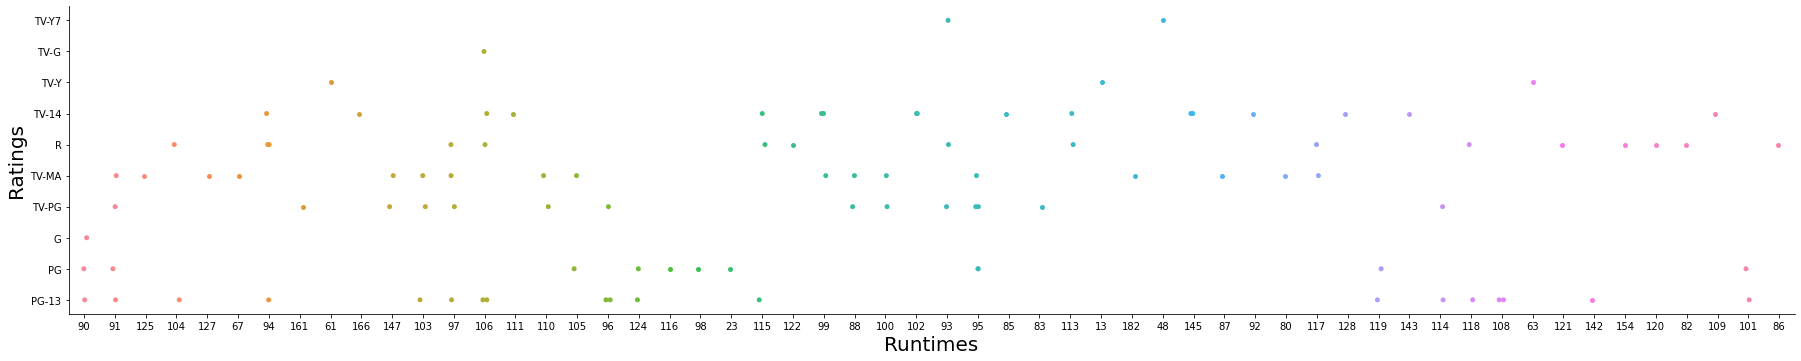

In [26]:
sns.catplot(y="rating", x="duration", data=movies_df[:101], aspect=5)
plt.xlabel("Runtimes",fontsize=20)
plt.ylabel("Ratings",fontsize=20)
plt.show()

There is no particular insight to be drawn from the runtimes per rating type for the first 101 titles in our movies dataset. Clearly, there are few rating categories which are decidedly less popular than the others and hence have little representation on the dataset above.

In [27]:
titles["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

### Ratings vs the titles listed under column

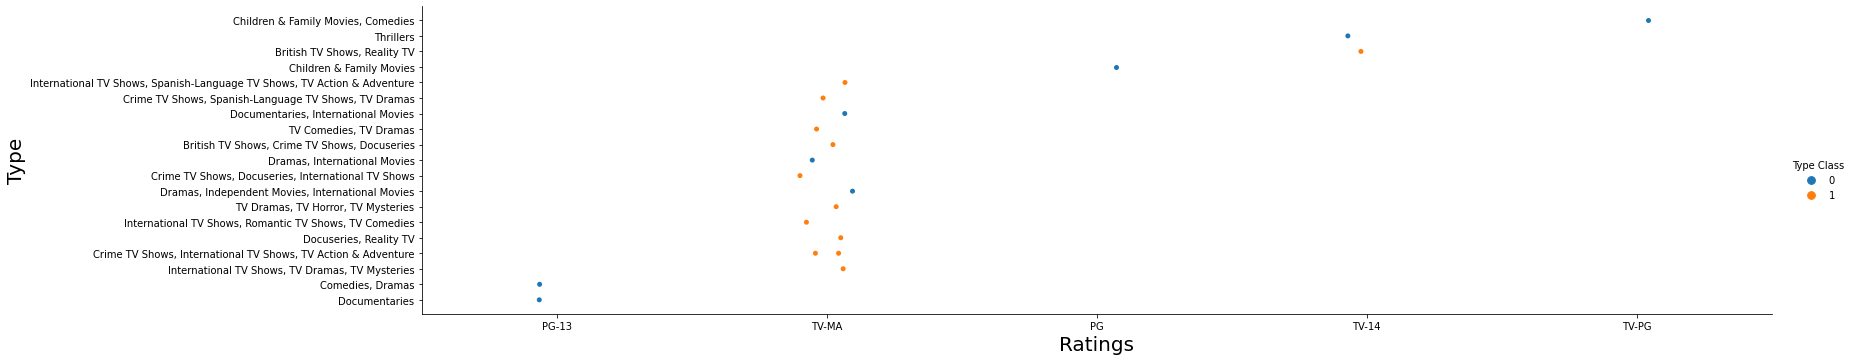

In [28]:
sns.catplot(y="listed_in", x="rating", hue="Type Class", data=titles[:20], aspect=5)
plt.xlabel("Ratings",fontsize=20)
plt.ylabel("Type",fontsize=20)
plt.show()

Clearly, this scatter plot needs improvement as the sheer number of title types is of a wide variety in our dataset.

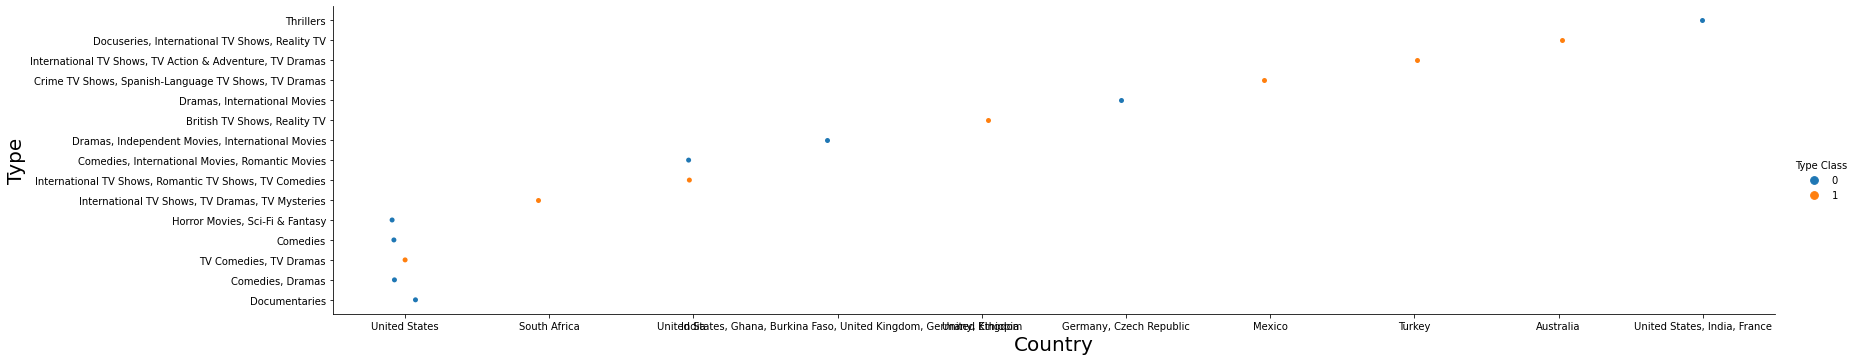

In [29]:
sns.catplot(y="listed_in", x="country", hue="Type Class", data=titles[:30], aspect=5)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Type",fontsize=20)
plt.show()

Clearly, this scatter plot needs improvement as the sheer number of title types and production countries is of a wide variety in our dataset. 

### Top 15 Directors in the movies list

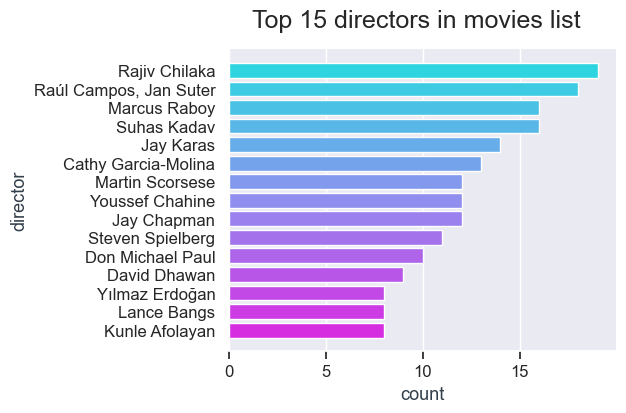

In [50]:
bar_plot_data(titles, "director", "Top 15 directors in movies list");

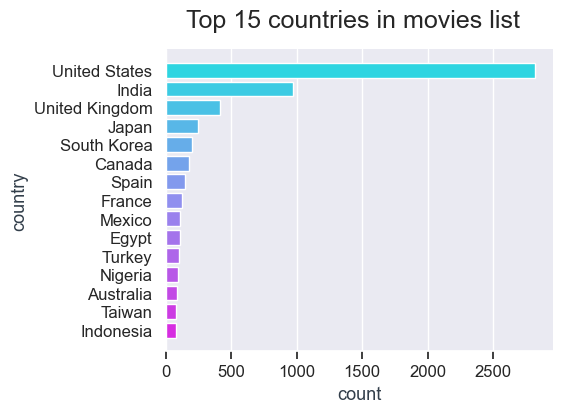

In [51]:
bar_plot_data(titles, "country", "Top 15 countries in movies list")

In [54]:
titles['cast'] = titles['cast'].fillna('Unknown')

### Netflix TV Show Seasons Distribution

Listing out the seasonal distribution of Netflix shows irrespective of country of origin.

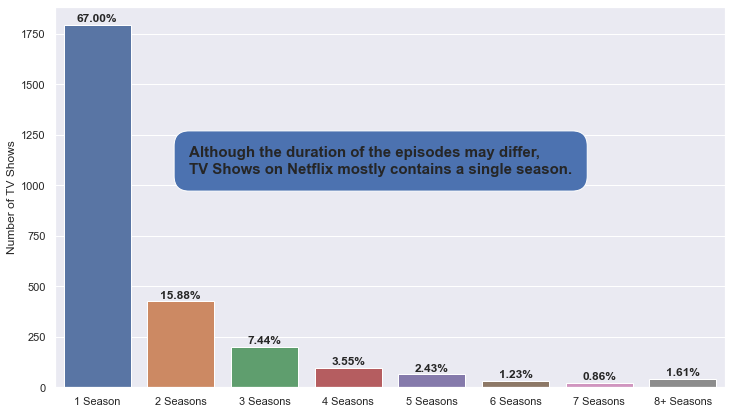

In [30]:
# filterin TV Shows, and calculating counts by number of season
shows_by_seasons = titles.loc[titles["type"]=="TV Show",["duration"]].value_counts()
shows_by_seasons = pd.DataFrame(shows_by_seasons).reset_index()
shows_by_seasons.columns = ["Number of Seasons", "Number of TV Shows"]

# taking the integer value from "Number of Seasons"
shows_by_seasons["no_season"] = list(map(int, shows_by_seasons["Number of Seasons"].str.split(expand = True)[0]))

# there are not many films with more than 8 seasons
# so i will group them and use a single row
count_8plus = shows_by_seasons.loc[shows_by_seasons["no_season"]>7,"Number of TV Shows"].sum()
shows_by_seasons = shows_by_seasons[shows_by_seasons["no_season"]<8]
shows_by_seasons.loc[len(shows_by_seasons.index)] = ["8+ Seasons", count_8plus, "8+"]

# calculating percentages
total_shows = shows_by_seasons["Number of TV Shows"].sum()
shows_by_seasons["Percentage"] = 100 * shows_by_seasons["Number of TV Shows"] / total_shows

# Plot
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(12, 7))


sns.barplot(data=shows_by_seasons,
            y="Number of TV Shows", x="Number of Seasons")

txt = '''Although the duration of the episodes may differ,
TV Shows on Netflix mostly contains a single season.'''
fig.text(0.28, 0.55, txt,
         fontsize=15, fontweight="bold", fontfamily="sans-serif",
         bbox=dict(boxstyle="Round, pad=1") )

for i in shows_by_seasons["Percentage"].index:
    ax.annotate("{:.2f}%".format(shows_by_seasons["Percentage"][i]), 
                   xy=(i, shows_by_seasons["Number of TV Shows"][i] + 30),
                   va = "center", ha="center",fontweight="bold")

plt.xlabel("")
plt.show()

### Creating function to split `listed_in` column into a list and see the popular ones

In [58]:
def create_count_dataframe(df: dict, column: str):
    count_ = dict()
    for current in df[column]:
        names = current.split(",")
        for name in names:
            if name not in count_:
                count_[name] = 0
            count_[name] += 1
            
    df_count = {"name": [], "count": []}
    for key, value in count_.items():
        df_count["name"].append(key) 
        df_count["count"].append(value)
    return pd.DataFrame(df_count)
                

listed_df = create_count_dataframe(titles, "listed_in")
listed_df = listed_df.sort_values("count", ascending=False)
listed_df.head(10)

,name,count
16,International Movies,2624
14,Dramas,1600
18,Comedies,1210
33,Action & Adventure,859
0,Documentaries,829
19,Dramas,827
1,International TV Shows,774
15,Independent Movies,736
2,TV Dramas,696
26,Romantic Movies,613


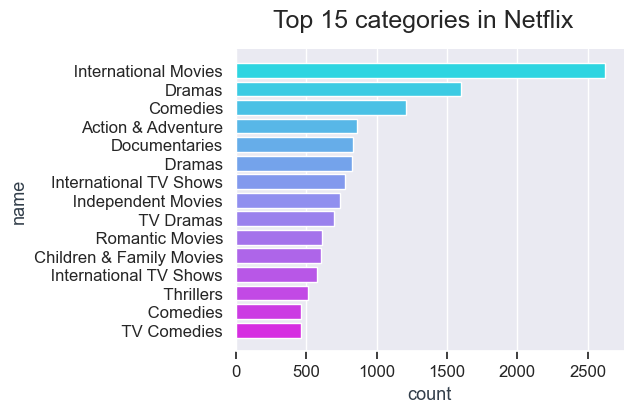

In [59]:
bar_plot_data_v2(listed_df, {"y": "name", "x": "count"}, "Top 15 categories in Netflix")

###  Actors involved in the most projects

In [60]:
cast_df = create_count_dataframe(titles, "cast")
cast_df = cast_df.query('name != "Unknown"')
cast_df = cast_df.sort_values("count", ascending=False)
cast_df.head(10)

,name,count
1450,Anupam Kher,39
305,Rupa Bhimani,31
5056,Takahiro Sakurai,30
304,Julie Tejwani,28
12108,Om Puri,27
307,Rajesh Kava,26
2212,Shah Rukh Khan,26
6014,Yuki Kaji,25
7644,Paresh Rawal,25
3728,Andrea Libman,25


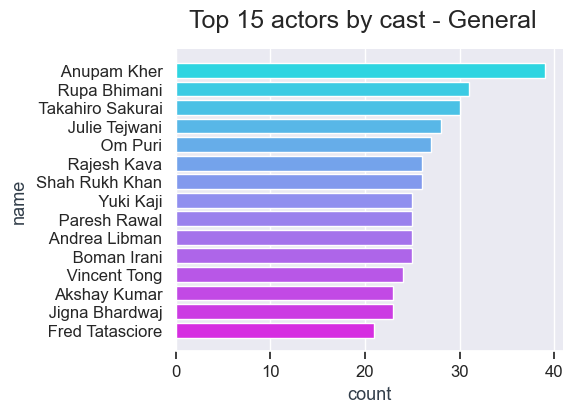

In [61]:
bar_plot_data_v2(cast_df, {"y": "name", "x": "count"}, "Top 15 actors by cast - General")

### Top 15 actors according to the country of movies created

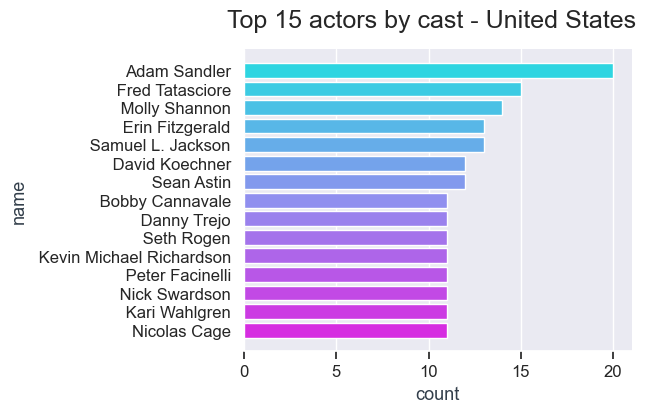

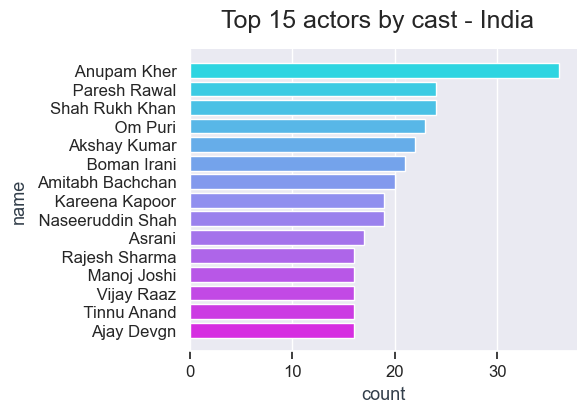

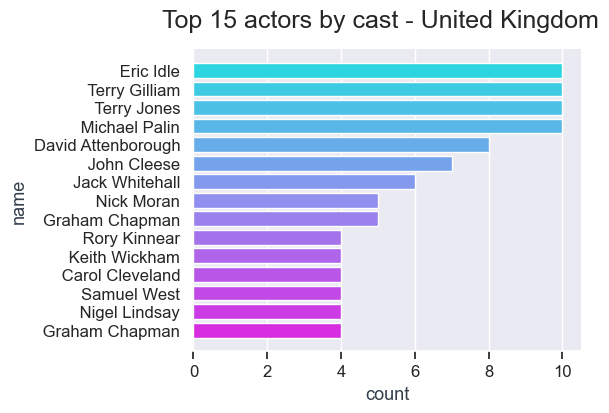

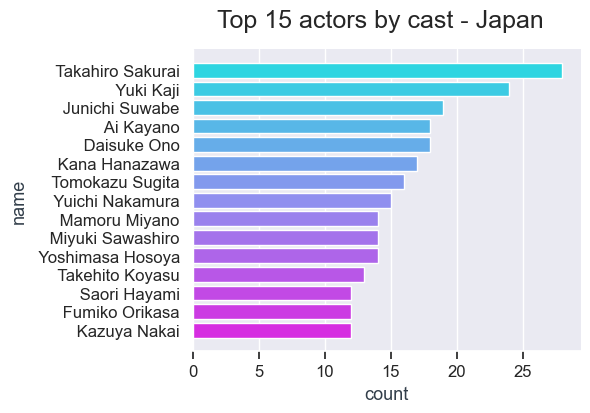

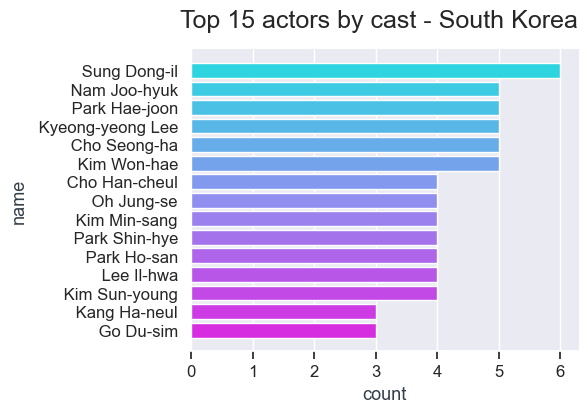

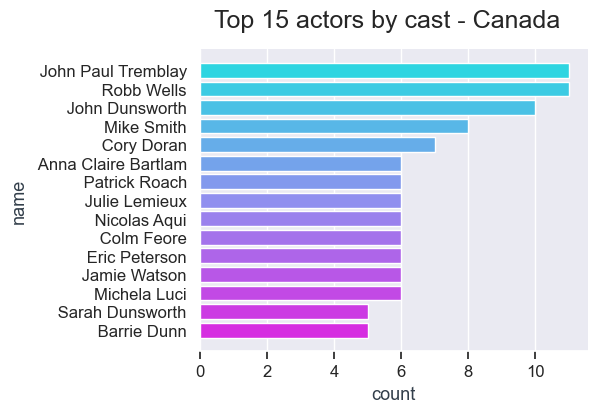

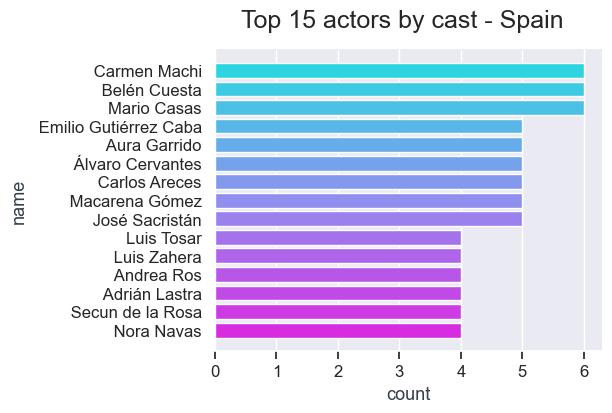

In [62]:
for filter_country in ["United States", "India", "United Kingdom", "Japan", 
                       "South Korea", "Canada", "Spain"]:
    cast_df_by_country = titles.query(f'country in "{filter_country}"')
    cast_df_by_country = cast_df_by_country.query('cast != "Unknown"')
    cast_df_by_country = create_count_dataframe(cast_df_by_country, "cast")
    cast_df_by_country = cast_df_by_country.sort_values("count", ascending=False)
    bar_plot_data_v2(cast_df_by_country, {"y": "name", "x": "count"}, f"Top 15 actors by cast - {filter_country}")

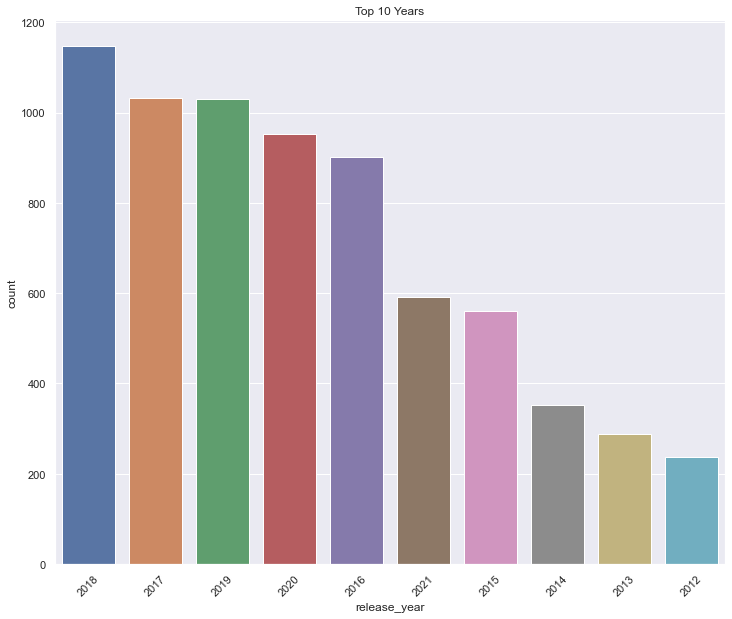

In [67]:
#Countplot for the years with highest number of releases
plt.figure(figsize=(12,10))
plt.title('Top 10 Years')
years =sns.countplot(x='release_year', data=titles, order=titles['release_year'].value_counts().index[:10])
years.set_xticklabels(years.get_xticklabels(), rotation=45)
plt.show()

### Creating a recommendor system based on particular titles selected

Convert a collection of raw documents to a matrix of TF-IDF features using `TfidfVectorizer`.

#### Building a plot line based recommender

* Steps:

1. Text preprocessing
2. Generate tf-idf vectors
3. Generate cosine-similarity matrix
4. The recommender function:
    * Take a movie title, cosine similarity matrix and indices series as arguments
    * Extract pairwise cosine similarity scores for the movie
    * Sort the scores in descending order
    * Output titles corresponding to the highest scores
    * Ignore the highest similarity score (of 1)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

The recommendation system will be based on the descriptions of the titles.

In [70]:
tfidf_matrix = tfidf.fit_transform(titles['description'])
tfidf_matrix.shape

(8807, 18895)

We check cosine_similarity between descriptions listed for all titles in the Netflix dataset.

In [71]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [74]:
indices = pd.Series(titles.index, index=titles['title']).drop_duplicates()

In [77]:
#Recommendation Fucntion
def get_recommendations(title):
    idx = indices[title]

    #Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Geting the scores of the 10 most similar movies
    #Started at index 1 because index 0 is the one with the 1 cosine similarity which is the same show
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]
    return titles['title'].iloc[movie_indices]

In [78]:
get_recommendations('Riverdale')

1038                       Dancing Angels
2173                               Moesha
4591                           My Suicide
6996                             Hormones
2979                         THE STRANGER
2790                   Greenhouse Academy
1982                             Anaamika
1986                     Nee Enge En Anbe
3087    Yanxi Palace: Princess Adventures
5225                        Kingdom of Us
Name: title, dtype: object

In [79]:
get_recommendations('American Vandal')

7029            Huntik: Secrets and Seekers
2606                        Extracurricular
2268                                   Boss
310     Cocaine Cowboys: The Kings of Miami
8668                         V for Vendetta
2587                     Mrs. Serial Killer
5038                                Re:Mind
3022                        Bulbul Can Sing
2272                               Drishyam
7419                                 Masoom
Name: title, dtype: object